<a href="https://colab.research.google.com/github/IrfanMaulanaaaa/Dataset/blob/main/Walmart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

import statsmodels.api as sm

In [ ]:
df = pd.read_csv("/content/Walmart_sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
df[['Store']] = df[['Store']].astype(str)  #converting store to string
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')  # converting date column to date,month,year
df['date'] = df['Date'].dt.date.astype(str)
df['Year'] = df['Date'].dt.year.astype(str)   #converting date,month and year to string
df['Month'] = df['Date'].dt.month.astype(str)
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010,3
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012-09-28,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012-10-05,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012-10-12,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012-10-19,2012,10


In [ ]:
df.dtypes

Store                   object
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
date                    object
Year                    object
Month                   object
dtype: object

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   date          6435 non-null   object        
 9   Year          6435 non-null   object        
 10  Month         6435 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 553.1+ KB


In [ ]:
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
date            0
Year            0
Month           0
dtype: int64

In [ ]:
df.columns


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'date', 'Year', 'Month'],
      dtype='object')

In [ ]:
df['Store'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45'],
      dtype=object)

In [ ]:
df["Holiday_Flag"].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [ ]:
df.describe()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


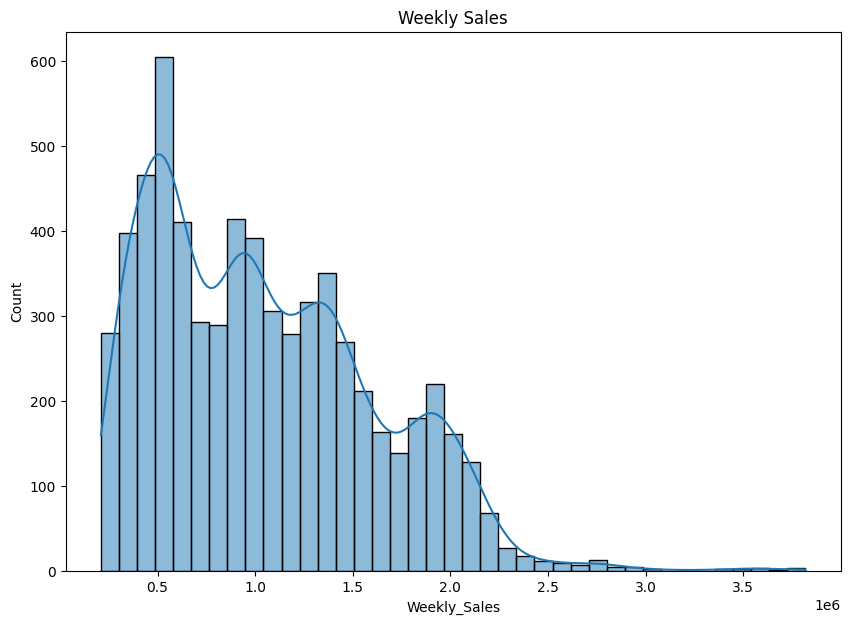

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(df['Weekly_Sales'],kde = True)
plt.title("Weekly Sales")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

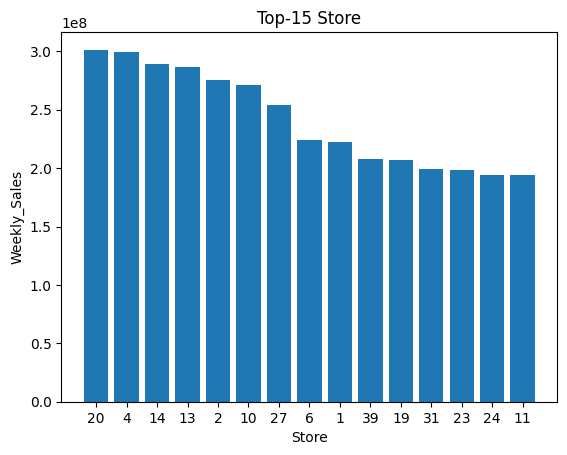

In [ ]:
top_n = 15
x_col = 'Store'
y_col = 'Weekly_Sales'

# Create a frequency table for the "Product" column
table = df.groupby(x_col)[y_col].sum().sort_values(ascending=False)

# Create a bar chart
plt.bar(table.index[:top_n], table.values[:top_n])

# Set the chart title and axes labels
plt.title(f'Top-{min(top_n, len(table.index))} {x_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

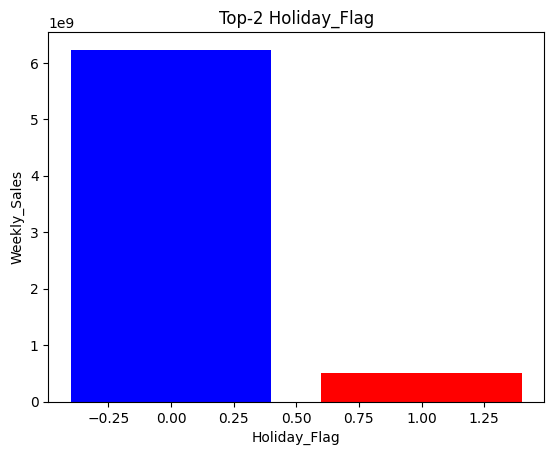

In [ ]:
top_n = 2
x_col = 'Holiday_Flag'
y_col = 'Weekly_Sales'

# Create a frequency table for the "Product" column
table = df.groupby(x_col)[y_col].sum().sort_values(ascending=False)

# Create a bar chart
plt.bar(table.index[:top_n], table.values[:top_n],color=['blue', 'red'])

# Set the chart title and axes labels
plt.title(f'Top-{min(top_n, len(table.index))} {x_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)

plt.show

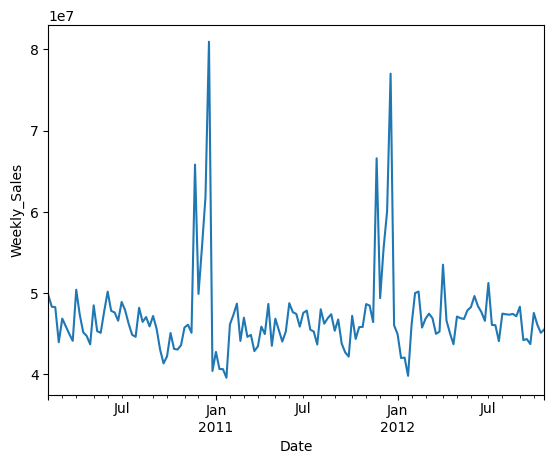

In [ ]:
data = df.groupby("Date")["Weekly_Sales"].sum()
data.plot()
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.show()

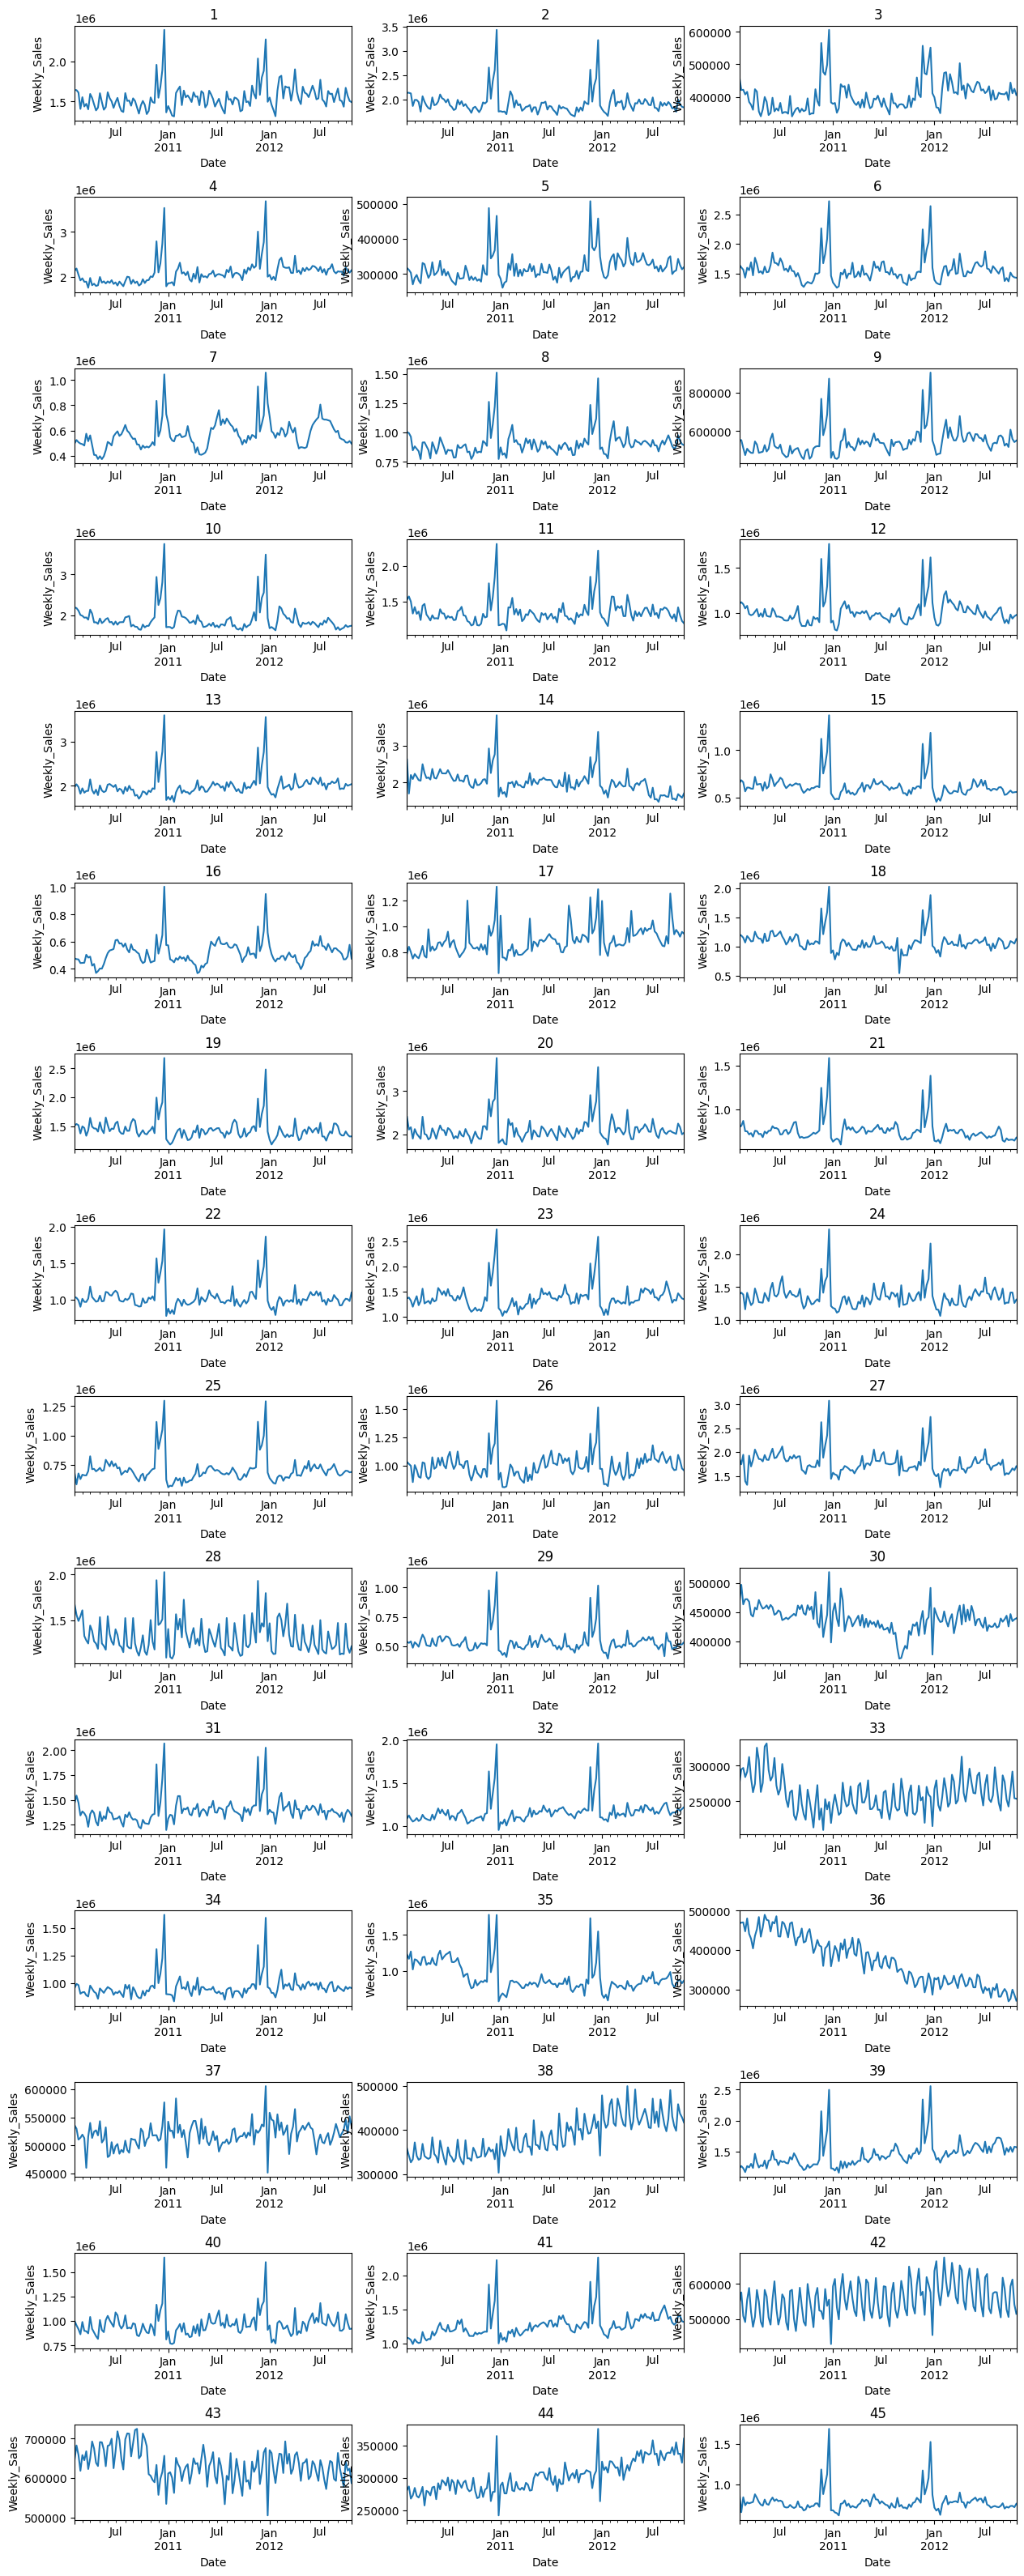

In [ ]:
plt.figure(figsize=(15, 40))
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)

for store, df_store in df.groupby('Store'):
    data = df_store.groupby("Date")["Weekly_Sales"].sum()
    plt.subplot(15, 3, int(store))
    data.plot()
    plt.title(store)
    plt.xlabel('Date')
    plt.ylabel('Weekly_Sales')

plt.show()

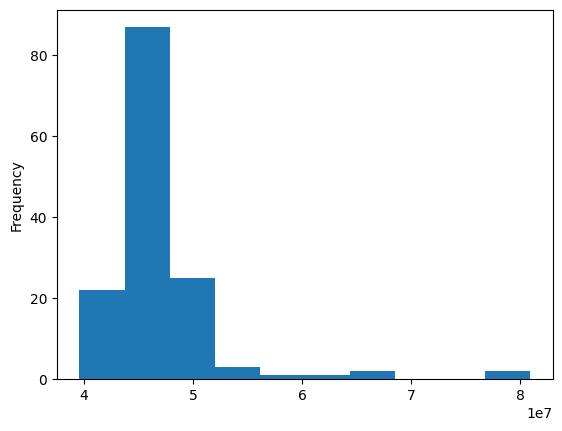

In [ ]:
data = df.groupby(["Date"])["Weekly_Sales"].sum()
data.plot.hist()
plt.show()

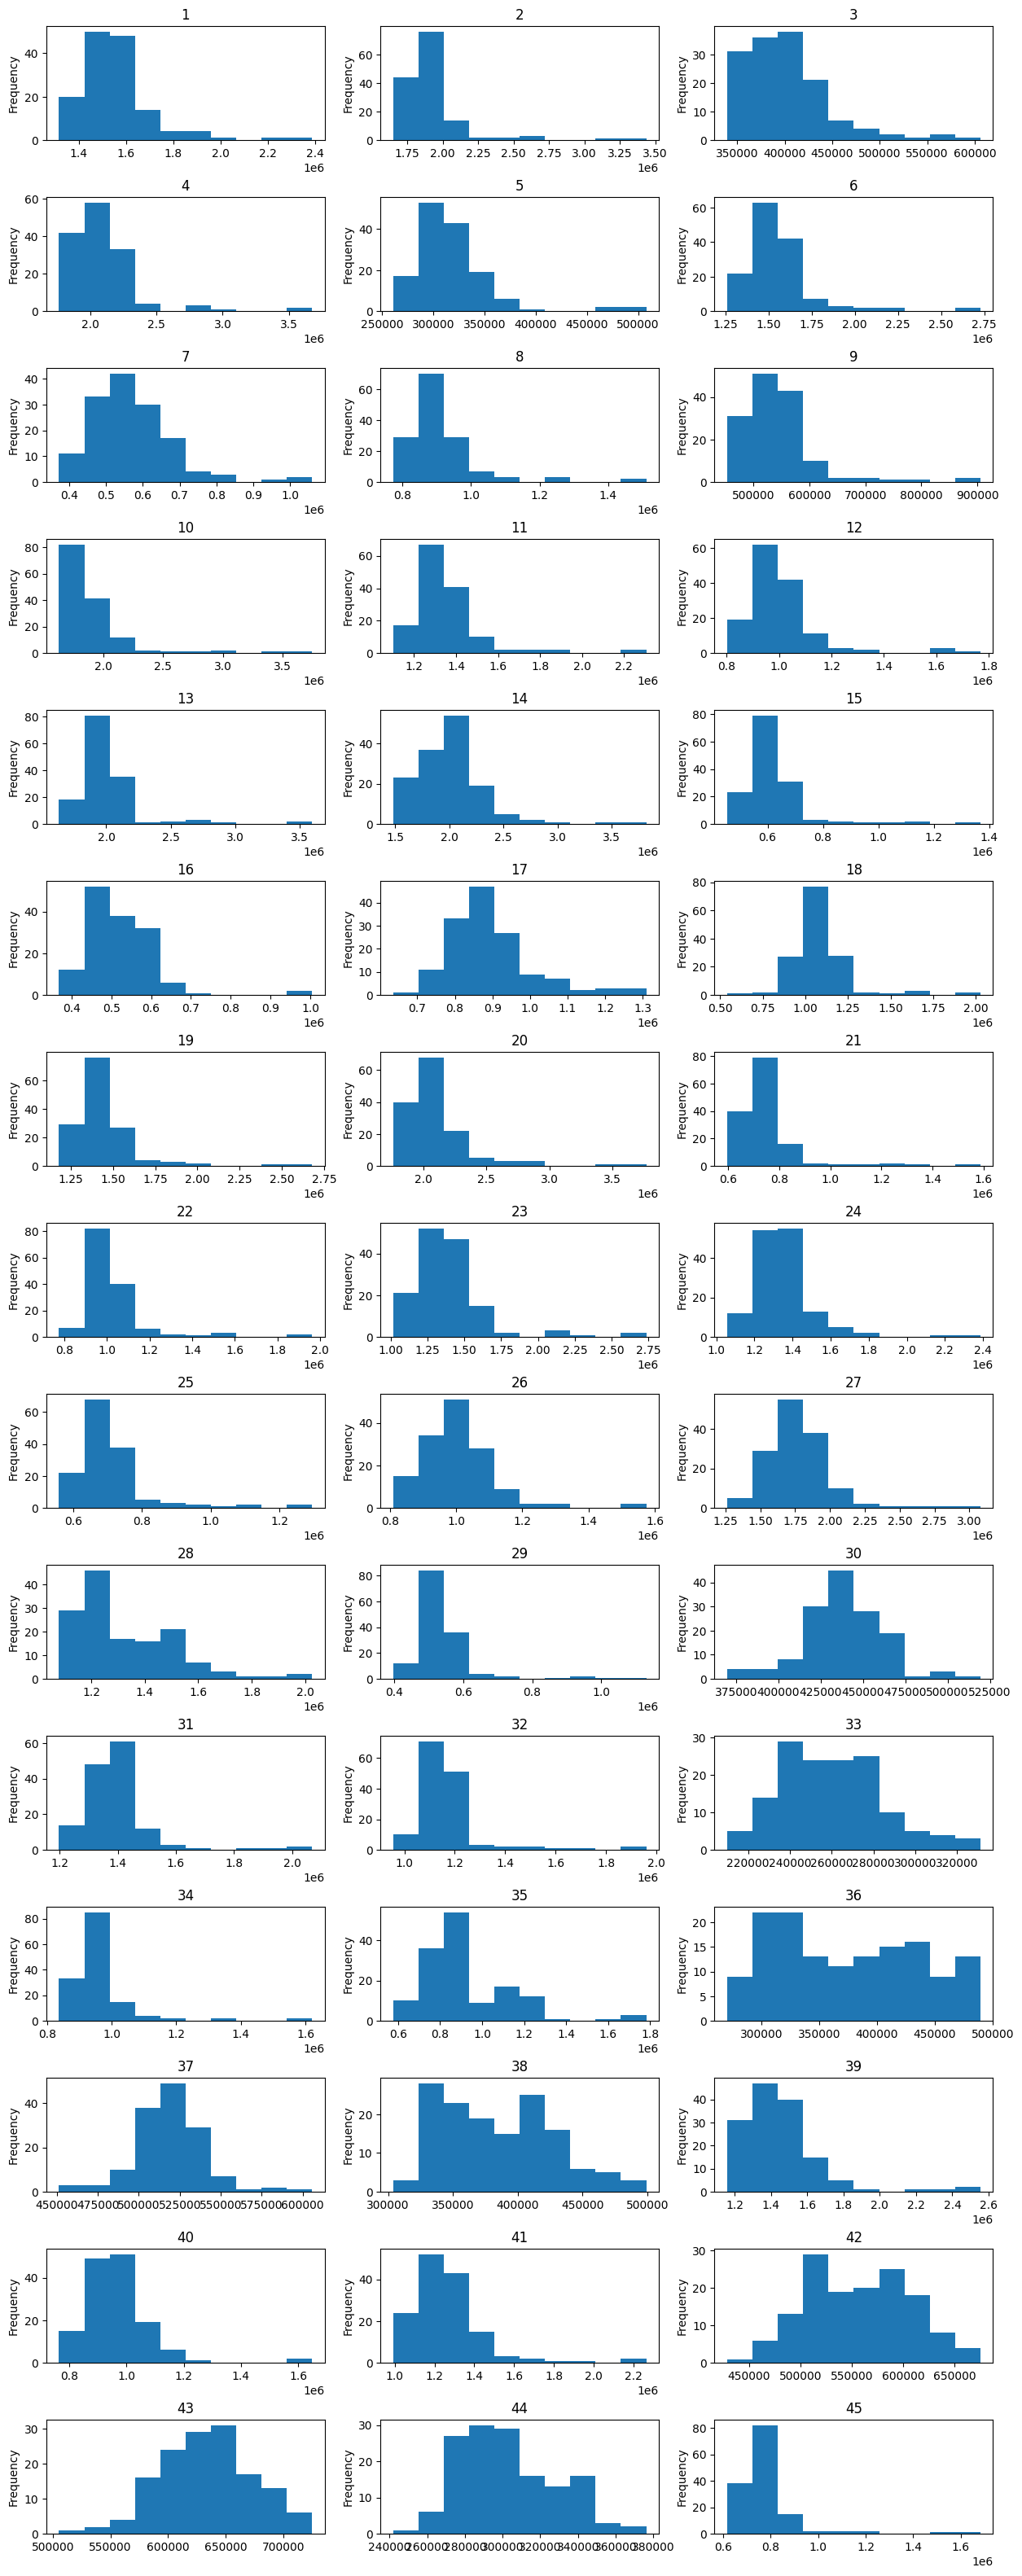

In [ ]:
plt.figure(figsize=(15, 40))
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

for store, df_store in df.groupby('Store'):
    data = df_store.groupby(['Date'])["Weekly_Sales"].sum()
    plt.subplot(15, 3, int(store))
    plt.title(store)
    data.plot.hist()

plt.show()

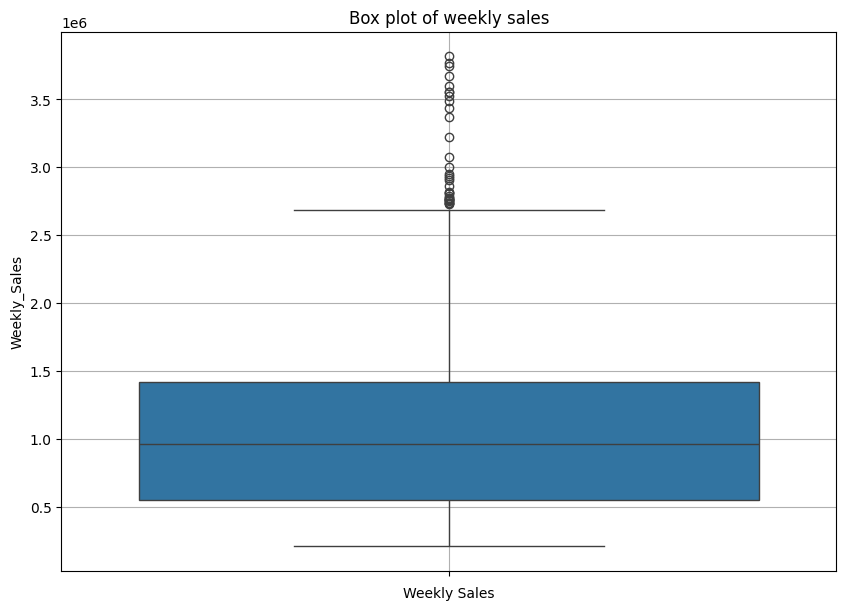

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(df['Weekly_Sales'])
plt.xlabel("Weekly Sales")
plt.title("Box plot of weekly sales")
plt.grid(True)

In [ ]:
Q1 = df["Weekly_Sales"].quantile(0.25)
Q3 = df["Weekly_Sales"].quantile(0.75)

#fing IQR
IQR = Q3-Q1

lower_bound = Q1-IQR*1.5
upper_bound = Q3+IQR*1.5

In [ ]:
Q1

553350.105

In [ ]:
Q3

1420158.66

In [ ]:
IQR

866808.5549999999

In [ ]:
lower_bound

-746862.7275

In [ ]:
upper_bound

2720371.4924999997

In [ ]:
data_without_outliers = df[(df["Weekly_Sales"]>=lower_bound ) & (df["Weekly_Sales"]<=upper_bound)]

In [ ]:
data_without_outliers

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010,3
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012-09-28,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012-10-05,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012-10-12,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012-10-19,2012,10


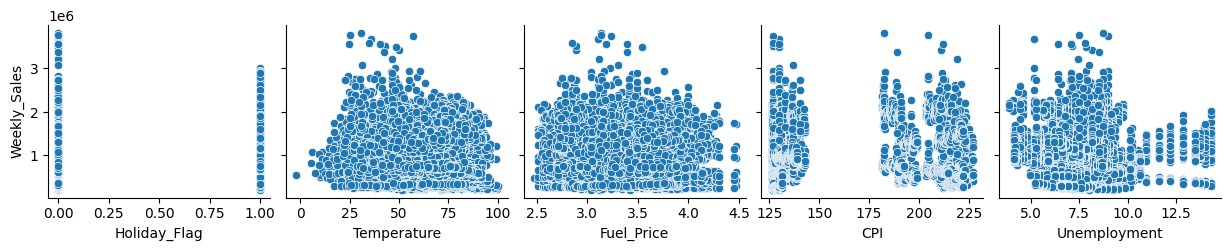

In [ ]:
sns.pairplot(df, x_vars=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
             y_vars=['Weekly_Sales'], kind='scatter')
plt.show()

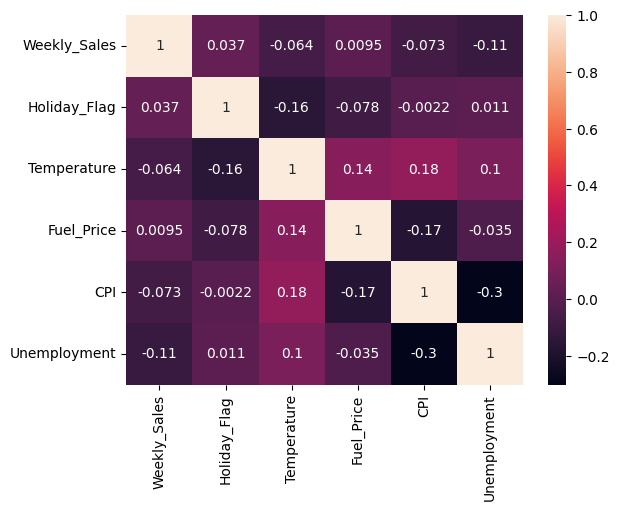

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.show()

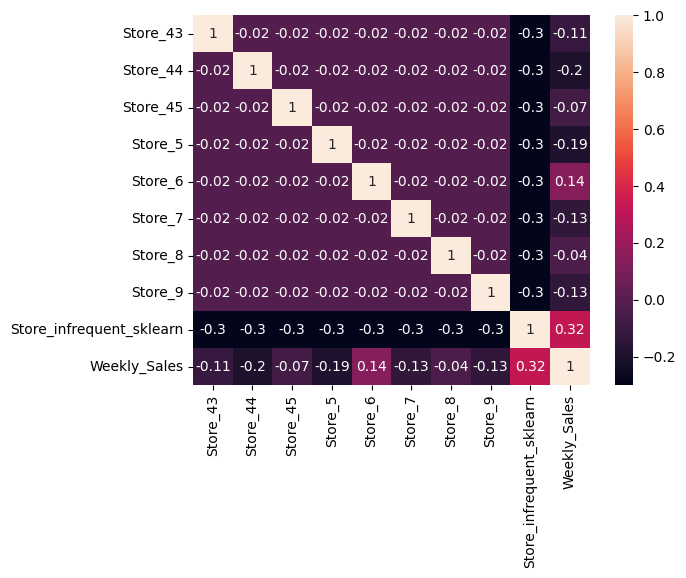

In [ ]:
one_hot_encoded_stores = OneHotEncoder(drop='first', max_categories=10, sparse_output=False).fit(df[['Store']])
df_one_hot_encoded_stores = pd.DataFrame(one_hot_encoded_stores.transform(df[['Store']]), columns=one_hot_encoded_stores.get_feature_names_out())
df_one_hot_encoded_stores['Weekly_Sales'] = df['Weekly_Sales']

sns.heatmap(df_one_hot_encoded_stores.corr(numeric_only=True).round(2), annot = True)
plt.show()

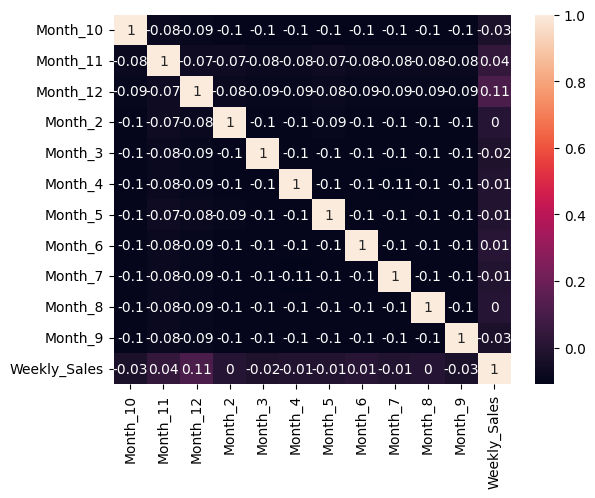

In [ ]:
one_hot_encoded_month = OneHotEncoder(drop='first', sparse_output=False).fit(df[['Month']])
df_one_hot_encoded_month = pd.DataFrame(one_hot_encoded_month.transform(df[['Month']]), columns=one_hot_encoded_month.get_feature_names_out())
df_one_hot_encoded_month['Weekly_Sales'] = df['Weekly_Sales']

sns.heatmap(df_one_hot_encoded_month.corr(numeric_only=True).round(2), annot = True)
plt.show()

In [ ]:
df.columns


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'date', 'Year', 'Month'],
      dtype='object')

In [ ]:
df[['Holiday_Flag']] = df[['Holiday_Flag']].astype(str)


In [ ]:
df.dtypes


Store                   object
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag            object
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
date                    object
Year                    object
Month                   object
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler


numerical_col = [ 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
StandardScaler().fit_transform(df[numerical_col])

array([[-0.99513556, -1.71379998,  1.00417522,  0.05696366],
       [-1.20117022, -1.76608938,  1.00788038,  0.05696366],
       [-1.12417832, -1.84016603,  1.009074  ,  0.05696366],
       ...,
       [-0.33582468,  1.39741931,  0.52724129,  0.35604577],
       [-0.22738539,  1.32987884,  0.52733249,  0.35604577],
       [-0.09834264,  1.14032976,  0.52677459,  0.35604577]])

In [ ]:
categorical_col = ['Store', 'Holiday_Flag', 'Month']
numerical_col = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [ ]:
from sklearn.model_selection import train_test_split


df_sample = df.sample(3000, random_state=4)
X = df_sample[categorical_col+numerical_col]
y = df_sample[['Date','Weekly_Sales']].set_index('Date')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)

In [ ]:
X_train.head()

,Store,Holiday_Flag,Month,Temperature,Fuel_Price,CPI,Unemployment
2943,21,1,9,78.87,3.546,215.514829,7.852
1297,10,0,4,69.74,3.109,126.562100,9.524
4782,34,0,4,63.83,3.781,128.955300,10.581
4518,32,0,9,58.66,3.581,194.809971,8.622
5112,36,0,2,62.21,3.550,219.324464,7.244


In [ ]:
y_train.head()

,Weekly_Sales
Date,
2011-09-09,653989.65
2010-04-16,1826241.44
2011-04-22,1051518.45
2011-09-23,1116140.29
2012-02-24,313270.45


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


#Cross validation using decision tree,lasso and ridge regression(using this 3 models)
ds = DecisionTreeRegressor(random_state=4, max_depth=10)
ls = Lasso(random_state=4, selection='random', tol=1e-3)
rd = Ridge(random_state=4, tol=1e-3)

models_to_try = [ds, ls, rd]

In [ ]:
#cross validation using decision tree regressor
cross_val_scores = cross_val_score(ds, X_train, y_train, cv=4, scoring='r2')
print(ds)
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores)}")

DecisionTreeRegressor(max_depth=10, random_state=4)
Cross-Validation Scores: [0.89185347 0.88541663 0.89824169 0.89947131]
Mean Cross-Validation Score: 0.8937457746915296


In [ ]:
cross_val_scores = cross_val_score(ls, X_train, y_train, cv=4, scoring='r2')#cv=4 4fold cross validation
print(ls)
print(f"Cross-Validation Scores: {cross_val_scores}")#we got 4 r2 values(use 4fold cross validation)
print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores)}")

Lasso(random_state=4, selection='random', tol=0.001)
Cross-Validation Scores: [0.14539487 0.15215987 0.12433388 0.16261349]
Mean Cross-Validation Score: 0.14612552599169468


In [ ]:
cross_val_scores = cross_val_score(rd, X_train, y_train, cv=4, scoring='r2')
print(rd)
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores)}")

Ridge(random_state=4, tol=0.001)
Cross-Validation Scores: [0.1454134  0.15214409 0.12431203 0.1626525 ]
Mean Cross-Validation Score: 0.14613050747182776


In [ ]:
ds.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=4)

In [ ]:
y_pred = ds.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
r2 = r2_score(y_test, y_pred)
print(f'Test RMSE of best model = {rmse}')
print(f'Test R2 Score of best model = {r2}')

Test RMSE of best model = 179962.19069531956
Test R2 Score of best model = 0.8964871998390187


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz



# Refit the model on full training data

df_temp = df
X = df_temp[categorical_col+numerical_col]
y = df_temp[['Date','Weekly_Sales']].set_index('Date')

ds.fit(X, y)
y_pred = ds.predict(X)

#calculate metrics
rmse = np.sqrt(mean_squared_error(y_pred, y))
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y,y_pred)


# Note this is supposed to be high, since this is training RMSE and R2
print(f'Final Training RMSE = {rmse}')
print(f'Final Training R2 Score = {r2}')
print(f'Final Training MSE Score = {mse}')
print(f'Final Training MAE Score = {mae}')

Final Training RMSE = 92171.52880015693
Final Training R2 Score = 0.9733229111479244
Final Training MSE Score = 8495590721.358157
Final Training MAE Score = 52068.33145560382


In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

# Initialize the DecisionTreeRegressor
ds = DecisionTreeRegressor()

# Fit the model on the full training data to visualize the tree
ds.fit(X, y)

# Generate a graphviz representation of the decision tree
dot_data = export_graphviz(ds, out_file=None, feature_names=X.columns,
                           filled=True, rounded=True, special_characters=True)


graph = graphviz.Source(dot_data)

graph.view()

'Source.gv.pdf'